In [188]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [189]:
movies_arr = []
rating_arr = []
genres_arr = []
year_arr = []

for i in range(10):
    url = "https://www.kinoafisha.info/rating/movies/?page={}".format(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    movies_arr.append(list(map(lambda x: x.text, soup.find_all('a', class_="movieItem_title")))) 
    rating_arr.append(list(map(lambda x: float(x.text), soup.find_all('span', class_="rating_num")))) 
    genres_arr.append(list(map(lambda x: x.text, soup.find_all('span', class_="movieItem_genres"))))   
    year_arr.append(list(map(lambda x: x.text, soup.find_all('span', class_="movieItem_year")))) 
    


In [190]:
movies = np.array(movies_arr).flatten()
genres = np.array(genres_arr).flatten()
year = np.array(year_arr).flatten()
rating = np.array(rating_arr).flatten()
df = pd.DataFrame(data={"Фильм": movies,
                       "Жанры": genres,
                       "Год": year,
                       "Рейтинг": rating})

In [191]:
df[['Год','Страна']] = df['Год'].str.split(',',expand=True)
df = df[['Фильм', 'Жанры', 'Год','Страна', 'Рейтинг']]
df['Жанры'] = df['Жанры'].str.split(",", expand=True)[0] # выбираем основные жанры

In [192]:
df # моя база данных

,Фильм,Жанры,Год,Страна,Рейтинг
0,BTS: Yet to Come in Cinemas,музыка,2023,,9.3
1,Кот в сапогах 2: Последнее желание,анимация,2022,США,9.1
2,Аватар 2: Путь воды,приключения,2022,США,9.1
3,Чебурашка,семейный,2022,Россия,9.1
4,Зеленая миля,драма,1999,США,9.1
...,...,...,...,...,...
995,Дэдпул,фэнтези,2016,США / Канада,7.5
996,Домовой,комедия,2019,Россия,7.5
997,Лига справедливости,фантастика,2017,США,7.5
998,Грайндхаус,ужасы,2007,США / Канада,7.5


In [197]:
try:
    #gr_param = input("Введите, по какому признаку группировать\n1.Год\n2.Жанры\n3.Страна\n")
    res = df.groupby(gr_param).agg(['mean', 'count']).sort_values(by=('Рейтинг', 'mean'), ascending=False)['Рейтинг']
except KeyError:
    res = "Неправильный ввод"
print(res)

          mean  count
Год                  
1968  8.700000      1
1969  8.700000      1
1973  8.700000      1
2023  8.676923     13
1971  8.600000      2
1964  8.500000      1
1972  8.500000      2
1994  8.422222      9
1997  8.366667     12
1991  8.360000      5
1961  8.350000      2
1996  8.300000      1
1979  8.300000      3
2000  8.290000     10
1981  8.250000      2
1985  8.250000      2
1999  8.222222      9
1990  8.200000      6
      8.200000      1
2001  8.171429     14
1993  8.166667      3
2020  8.122727     22
2004  8.118750     16
1974  8.100000      1
1995  8.088889      9
1984  8.066667      6
1983  8.050000      2
1977  8.050000      2
1976  8.033333      3
2002  8.028571     14
2019  8.013462     52
1955  8.000000      1
2022  7.996364     55
2021  7.993220     59
2003  7.963636     11
2018  7.946032     63
2010  7.942254     71
1998  7.930000     10
1988  7.920000      5
2014  7.915385     26
2011  7.914062     64
2012  7.906452     31
1982  7.900000      1
1975  7.90

C:\Users\egrli\AppData\Local\Temp\ipykernel_11604\4158434225.py:3: FutureWarning: ['Фильм', 'Жанры', 'Страна'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  res = df.groupby(gr_param).agg(['mean', 'count']).sort_values(by=('Рейтинг', 'mean'), ascending=False)['Рейтинг']


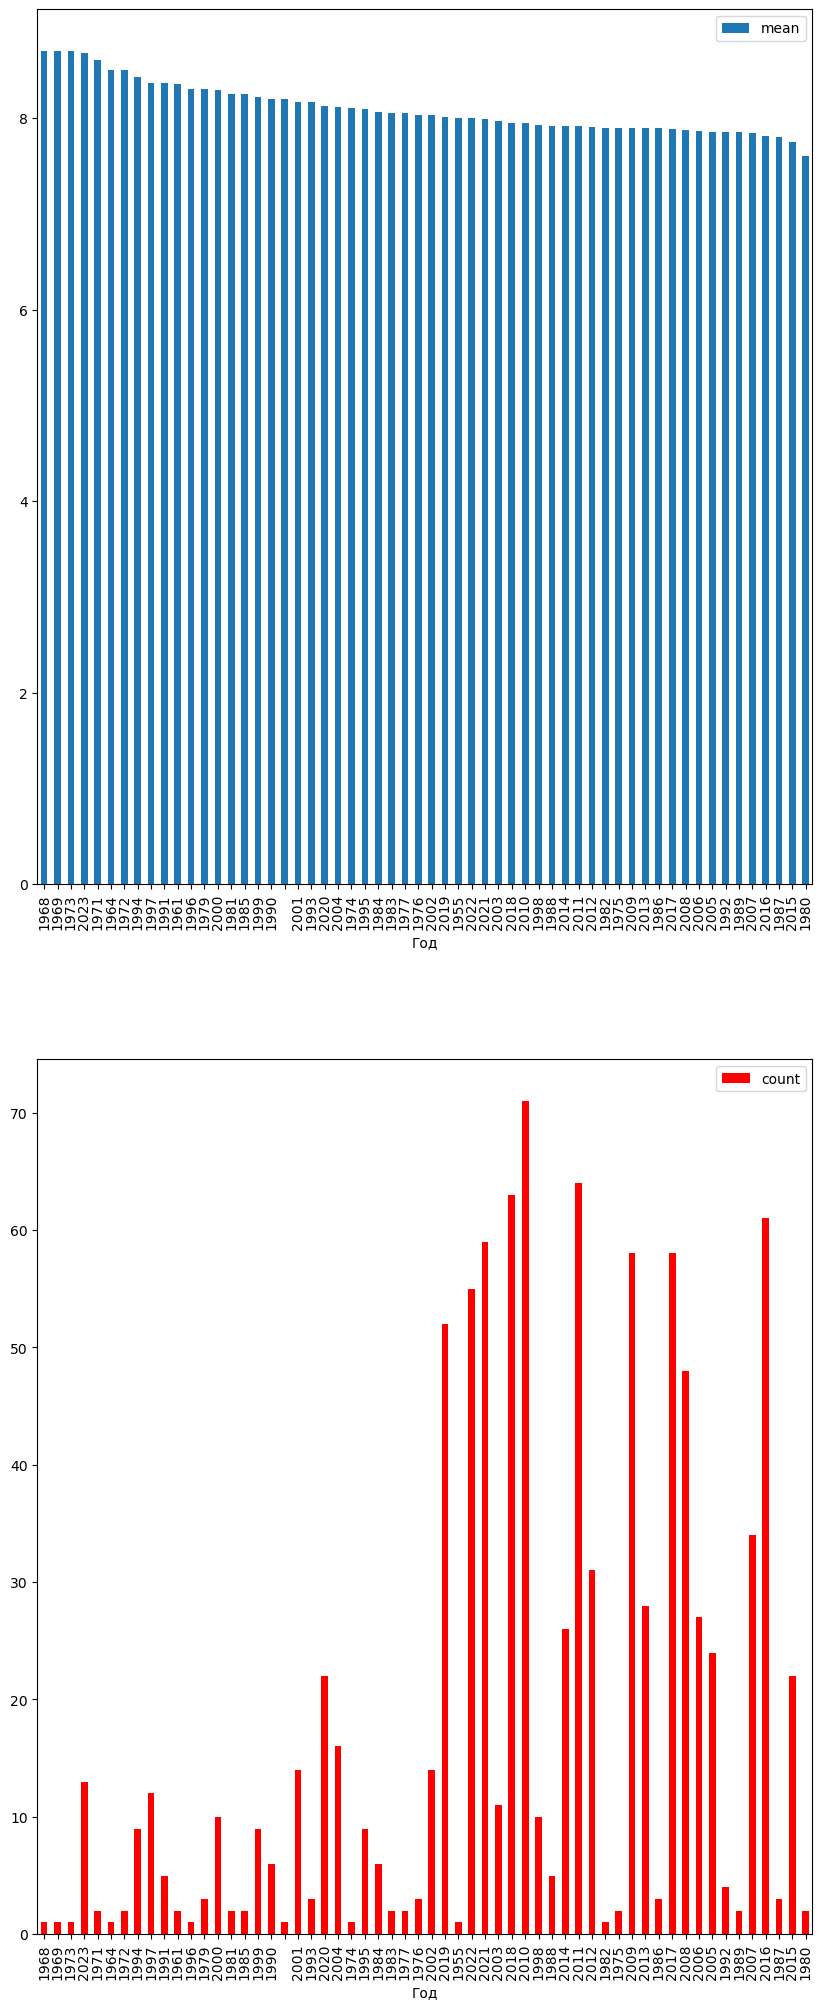

In [194]:
if type(res) != str:
    fig, axs = plt.subplots(figsize = (10, 25), nrows=2, ncols=1)
    res.plot(kind='bar', y='mean', ax=axs[0])
    res.plot(kind='bar', y='count',  ax=axs[1], color='r')
    #res.plot(kind='bar',  ax=axs)
    plt.show()
    #axs.set_yticks(range(1, 100))